In [942]:
#importar las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [943]:
#importar el dataset
dataset=pd.read_csv('C:/Users/javie/OneDrive/Escritorio/7mo semestre/MineriaDeDatos/PIA/CAR.csv')
dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [944]:
dataset.describe()
#solo describe las variables numericas

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [945]:
dataset.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [946]:
datasetcopy=dataset.drop(['name'],axis=1)
datasetcopy.head()
#el nombre solo es un identificador, no una variable relevante para la regresion

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [947]:
#codificar las variables categoricas
datasetcopy['transmission']=datasetcopy['transmission'].map({'Automatic':1,'Manual':0})
pd.get_dummies(datasetcopy, columns=["fuel","seller_type","owner"],prefix=["fuel","seller","owner"]).head()


,year,selling_price,km_driven,transmission,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_Dealer,seller_Individual,seller_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,False,False,False,False,True,False,True,False,True,False,False,False,False
1,2007,135000,50000,0,False,False,False,False,True,False,True,False,True,False,False,False,False
2,2012,600000,100000,0,False,True,False,False,False,False,True,False,True,False,False,False,False
3,2017,250000,46000,0,False,False,False,False,True,False,True,False,True,False,False,False,False
4,2014,450000,141000,0,False,True,False,False,False,False,True,False,False,False,True,False,False


In [948]:
datasetcopy=pd.get_dummies(datasetcopy, columns=["fuel","seller_type","owner"],prefix=["fuel","seller","owner"])

In [949]:
#cambiar false a 0 y true a 1
datasetcopy=datasetcopy*1
datasetcopy.head()

,year,selling_price,km_driven,transmission,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_Dealer,seller_Individual,seller_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,0,0,1,0,1,0,1,0,0,0,0
1,2007,135000,50000,0,0,0,0,0,1,0,1,0,1,0,0,0,0
2,2012,600000,100000,0,0,1,0,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,0,0,0,0,0,1,0,1,0,1,0,0,0,0
4,2014,450000,141000,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [950]:
datasetcopy.describe()

,year,selling_price,km_driven,transmission,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_Dealer,seller_Individual,seller_Trustmark Dealer,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,2013.090783,5.041273e+05,66215.777419,0.103226,0.009217,0.496083,0.000230,0.005300,0.489171,0.229032,0.747465,0.023502,0.652535,0.018664,0.254839,0.003917,0.070046
std,4.215344,5.785487e+05,46644.102194,0.304289,0.095571,0.500042,0.015179,0.072613,0.499940,0.420258,0.434516,0.151510,0.476220,0.135349,0.435821,0.062471,0.255254
min,1992.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.087498e+05,35000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.500000e+05,60000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000e+05,90000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2020.000000,8.900000e+06,806599.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Regresión

In [951]:
#la variable dependiente (y) es el selling_price
y=datasetcopy['selling_price']
#la variable independiente (x) es la cantidad de kilometros recorridos y el año, las demas pueden afectar. Se elegiran depende los valores de R^2, el ajustado y el p-valor de las variables 
x1=datasetcopy['km_driven']

In [952]:
#agregar la constante
x=sm.add_constant(x1)
#ajustar el modelo con el modelo fit(), de acuerdo al OLS con la variable dependiente y la independiente
results=sm.OLS(y,x).fit()

In [953]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     166.6
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           2.03e-37
Time:                        07:50:23   Log-Likelihood:                -63660.
No. Observations:                4340   AIC:                         1.273e+05
Df Residuals:                    4338   BIC:                         1.273e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.621e+05    1.5e+04     44.232      0.000    6.33e+05    6.91e+05
km_driven     -2.3850      0.185    -12.906      0.000      -2.747      -2.023
==============================================================================
Omnibus:                     4343.651   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           266817.521
Skew:                           4.883   Prob(JB):                         0.00
Kurtosis:                      40.150   Cond. No.                     1.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [954]:
#agregar km recorridos
x1=datasetcopy[['year','km_driven']]

In [955]:
#agregar la constante
x=sm.add_constant(x1)
#ajustar el modelo con el modelo fit(), de acuerdo al OLS con la variable dependiente y la independiente
results=sm.OLS(y,x).fit()

In [956]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     449.7
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          3.41e-178
Time:                        07:50:23   Log-Likelihood:                -63333.
No. Observations:                4340   AIC:                         1.267e+05
Df Residuals:                    4337   BIC:                         1.267e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.112e+08   4.21e+06    -26.408      0.000   -1.19e+08   -1.03e+08
year        5.551e+04   2089.613     26.566      0.000    5.14e+04    5.96e+04
km_driven     -0.2796      0.189     -1.481      0.139      -0.650       0.091
==============================================================================
Omnibus:                     4650.584   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           381421.757
Skew:                           5.370   Prob(JB):                         0.00
Kurtosis:                      47.653   Cond. No.                     4.27e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El año del vehículo tiene poder predictivo, se cumple el punto 1 de la conclusión. Además que se rechaza la $H_0$ por estar a un nivel menor de 0.5

In [957]:
x1=datasetcopy[['km_driven','year','transmission']]

In [958]:
#agregar la constante
x=sm.add_constant(x1)
#ajustar el modelo con el modelo fit(), de acuerdo al OLS con la variable dependiente y la independiente
results=sm.OLS(y,x).fit()

In [959]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     954.3
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        07:50:23   Log-Likelihood:                -62642.
No. Observations:                4340   AIC:                         1.253e+05
Df Residuals:                    4336   BIC:                         1.253e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.628e+07   3.61e+06    -26.662      0.000   -1.03e+08   -8.92e+07
km_driven        0.1543      0.161      0.956      0.339      -0.162       0.471
year          4.803e+04   1791.810     26.803      0.000    4.45e+04    5.15e+04
transmission  9.153e+05   2.27e+04     40.329      0.000    8.71e+05     9.6e+05
==============================================================================
Omnibus:                     4070.204   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           365040.703
Skew:                           4.207   Prob(JB):                         0.00
Kurtosis:                      47.135   Cond. No.                     4.29e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Al usar solo year y km_driven
* r-squared: 0.398
* adj: 0.397

selling price=-9.628e+07 + 0.1543*km_driven + 4.803e+04*year + 9.153e+05*dummy (0=manual, 1=automatico)

Manual:
selling price=-9.628e+07 + 0.1543*km_driven + 4.803e+04*year

Automatico=-95364700 + 0.1543*km_driven + 4.803e+04*year


In [961]:
x_1=datasetcopy['km_driven']
x_2=datasetcopy['year']
yhat_no=-96280000+0.1543*datasetcopy['km_driven']+48030*datasetcopy['year']
yhat_yes=-95364700+0.1543*datasetcopy['km_driven']+48030*datasetcopy['year']

In [962]:
from mpl_toolkits.mplot3d import Axes3D

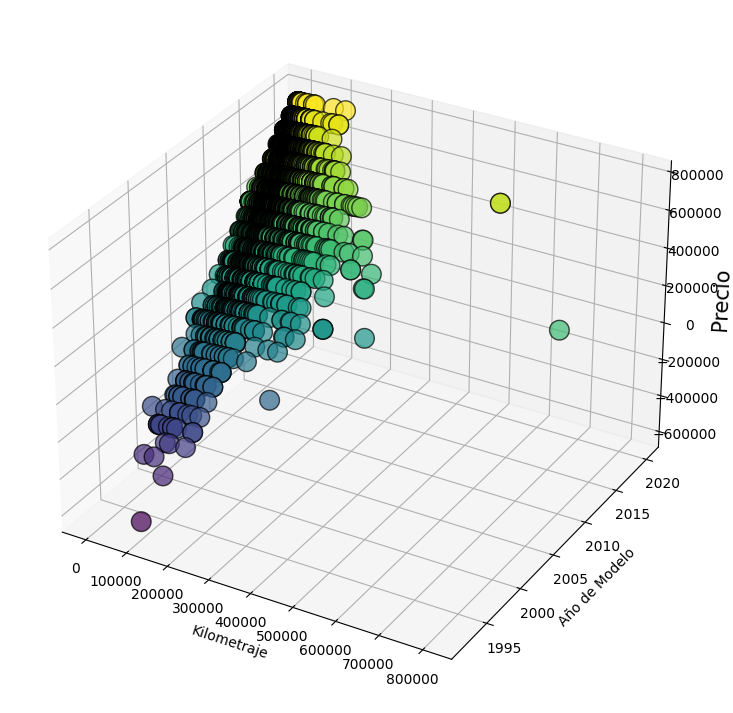

In [993]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_1, x_2, yhat_no,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=yhat_no)
plt.xlabel('Kilometraje',fontsize=10)
plt.ylabel('Año de Modelo',fontsize=10)
ax.set_zlabel('Precio', fontsize=15)
plt.show()

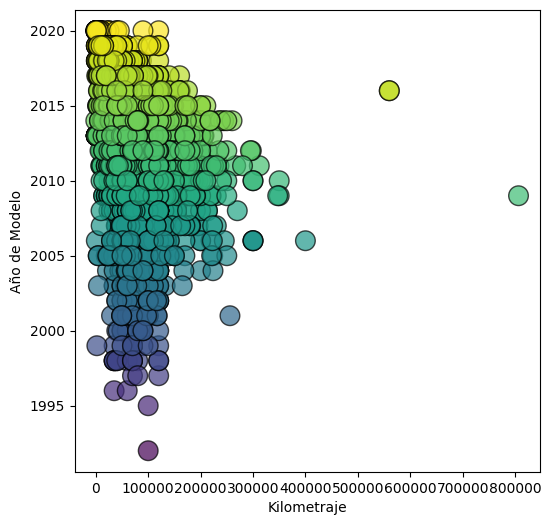

In [988]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(x_1, x_2,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=yhat_no)
plt.xlabel('Kilometraje',fontsize=10)
plt.ylabel('Año de Modelo',fontsize=10)
plt.show()

In [994]:
#Predicción


array([[0.0, 0.0, 0.0, ..., 'Manual', 'First Owner', 60000],
       [0.0, 0.0, 0.0, ..., 'Manual', 'First Owner', 135000],
       [0.0, 1.0, 0.0, ..., 'Manual', 'First Owner', 600000],
       ...,
       [0.0, 0.0, 0.0, ..., 'Manual', 'Second Owner', 110000],
       [0.0, 1.0, 0.0, ..., 'Manual', 'First Owner', 865000],
       [0.0, 0.0, 0.0, ..., 'Manual', 'First Owner', 225000]],
      dtype=object)

In [999]:
new_data=pd.DataFrame({'const':1,'km_driven':[25000,30000],'year':[2000,2002],'transmision':[0,1]})
new_data=new_data[['const','km_driven','year','transmision']]
new_data

,const,km_driven,year,transmision
0,1,25000,2000,0
1,1,30000,2002,1


In [1001]:
new_data.rename(index={0:'Toyota Camry',1:'Chevrolet Malibu'})

,const,km_driven,year,transmision
Toyota Camry,1,25000,2000,0
Chevrolet Malibu,1,30000,2002,1


In [1003]:
predictions=results.predict(new_data)
predictions

0   -225411.930557
1    786671.885433
dtype: float64

In [1005]:
predictionsdf=pd.DataFrame({'Prediction':predictions})
joined=new_data.join(predictionsdf)
joined.rename(index={0:'Toyota Camry',1:'Chevrolet Malibu'})

,const,km_driven,year,transmision,Prediction
Toyota Camry,1,25000,2000,0,-225411.930557
Chevrolet Malibu,1,30000,2002,1,786671.885433
